# Importing Libraries.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Load dataset
df = pd.read_csv('System Data.csv')
df.head()


,Timestamp,Age,Gender,Monthly Income,Region,Frequency of Shopping(Regular),Average spending,Categories,Means of Payment,Enrolled on Jumia Prime or any loyalty program,Frequency of shopping(Occassional),Rate of Satisfaction,Rate of availability of products,Reason for your purchase,Device to shop,Internet connection used,Recommendation to others
0,10/10/2024 12:46,25-34,Male,"<450,000",Central,"Daily, A few times a year","<50,000",Electronics,"Mobile Money, Cash on Delivery",No,Rarely,3,2,"Convenience, Delivery speed","Smart phones, Laptops","Mobile data, Public Wi-Fi",Yes
1,10/10/2024 14:56,25-34,Male,None,Northern,A few times a year,"50,000-100,000",Electronics,Cash on Delivery,No,Rarely,5,3,Product variety,Smart phones,Home Wi-Fi,No
2,10/10/2024 15:01,25-34,Male,">2,000,000",Western,A few times a year,"50,000-100,000",Electronics,"Mobile Money, Cash on Delivery",No,Rarely,3,3,"Price, Convenience, Discounts/offers",Smart phones,Mobile data,Yes
3,10/10/2024 15:03,35-44,Male,"450,000-1,000,000",Central,A few times a year,"<50,000",Health & Beauty,Cash on Delivery,No,Rarely,1,3,Price,Smart phones,Mobile data,Yes
4,10/10/2024 15:04,25-34,Male,None,Northern,A few times a year,"50,000-100,000",Electronics,Mobile Money,No,Occassionally,3,3,Convenience,Smart phones,Mobile data,Yes


# Data Cleaning

In [4]:
df.columns = df.columns.str.strip()
df = df.drop(columns=['Timestamp'])  # Drop Timestamp as it’s not relevant for segmentation


In [5]:
# Define categorical and numerical columns
categorical_cols = ['Age', 'Gender', 'Monthly Income', 'Region', 'Frequency of Shopping(Regular)', 
                    'Average spending', 'Categories', 'Means of Payment', 
                    'Enrolled on Jumia Prime or any loyalty program', 'Frequency of shopping(Occassional)', 
                    'Reason for your purchase', 'Device to shop', 'Internet connection used', 
                    'Recommendation to others']
numerical_cols = ['Rate of Satisfaction', 'Rate of availability of products']

In [6]:
print(df.columns)  # Check the actual column names


Index(['Age', 'Gender', 'Monthly Income', 'Region',
       'Frequency of Shopping(Regular)', 'Average spending', 'Categories',
       'Means of Payment', 'Enrolled on Jumia Prime or any loyalty program',
       'Frequency of shopping(Occassional)', 'Rate of Satisfaction',
       'Rate of availability of products', 'Reason for your purchase',
       'Device to shop', 'Internet connection used',
       'Recommendation to others'],
      dtype='object')


In [7]:
# # Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string to handle mixed types
    label_encoders[col] = le  # Save encoders for later use

In [8]:
# Combine features
X = df[categorical_cols + numerical_cols]

In [9]:
# Standardize the data (crucial for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
print("Preprocessed data shape:", X_scaled.shape)

Preprocessed data shape: (1002, 16)


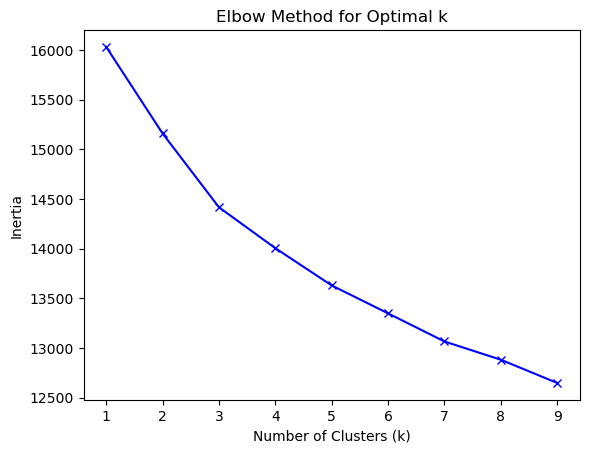

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate inertia for different k values
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Applying K-Means

In [12]:
# Apply K-Means with chosen k
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataframe
df['Cluster'] = clusters

# Display the first few rows with cluster assignments
print("Data with cluster labels:")
print(df.head())

Data with cluster labels:
   Age  Gender  Monthly Income  Region  Frequency of Shopping(Regular)  \
0    1       1               5       0                               2   
1    1       1               7       2                               0   
2    1       1               6       3                               0   
3    2       1               4       0                               0   
4    1       1               7       2                               0   

   Average spending  Categories  Means of Payment  \
0                 3           0                 4   
1                 2           0                 1   
2                 2           0                 4   
3                 3           3                 1   
4                 2           0                 2   

   Enrolled on Jumia Prime or any loyalty program  \
0                                               0   
1                                               0   
2                                               0  

# Analyze the Clusters

In [13]:
# Group by cluster and calculate means for numerical features
print("Cluster Characteristics (Numerical Features):")
print(df.groupby('Cluster')[numerical_cols].mean())

# Analyze categorical features (e.g., mode or counts)
for col in categorical_cols:
    print(f"\nCluster breakdown for {col}:")
    print(df.groupby('Cluster')[col].value_counts(normalize=True))

Cluster Characteristics (Numerical Features):
         Rate of Satisfaction  Rate of availability of products
Cluster                                                        
0                    2.932203                          2.818402
1                    3.088415                          2.981707
2                    3.026820                          3.252874

Cluster breakdown for Age:
Cluster  Age
0        3      0.239709
         4      0.217918
         2      0.205811
         1      0.174334
         0      0.162228
1        4      0.274390
         3      0.228659
         1      0.198171
         2      0.155488
         0      0.143293
2        0      0.367816
         1      0.321839
         3      0.130268
         2      0.118774
         4      0.057471
         5      0.003831
Name: Age, dtype: float64

Cluster breakdown for Gender:
Cluster  Gender
0        1         0.375303
         2         0.329298
         0         0.295400
1        2         0.420732
        

# Visualize the Clusters

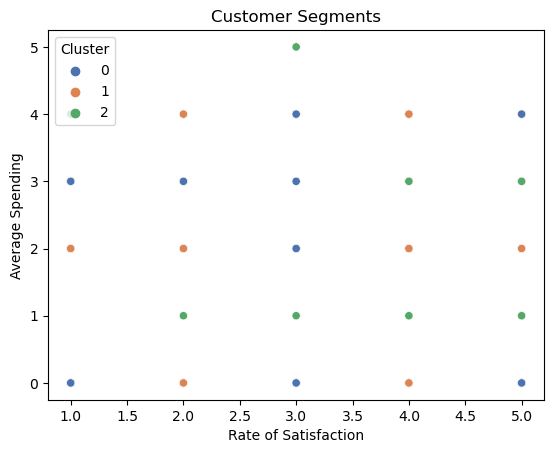

In [14]:
import seaborn as sns

# Scatter plot
sns.scatterplot(x=df['Rate of Satisfaction'], y=df['Average spending'], hue=df['Cluster'], palette='deep')
plt.xlabel('Rate of Satisfaction')
plt.ylabel('Average Spending')
plt.title('Customer Segments')
plt.show()

In [15]:
import joblib

# Save the K-Means model, scaler, and label encoders
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

print("K-Means model, scaler, and encoders saved successfully.")

K-Means model, scaler, and encoders saved successfully.


In [16]:
from sklearn.cluster import KMeans

# Train the K-Means model with K=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df)

# Display first few rows with cluster assignments
print(df[['Cluster']].head())


   Cluster
0        3
1        1
2        2
3        2
4        3


In [17]:
import joblib

# Load the saved files
kmeans = joblib.load('kmeans_model.pkl')
scaler = joblib.load('scaler.pkl')
label_encoders = joblib.load('label_encoders.pkl')

# Verify contents
print("K-Means clusters:", kmeans.n_clusters)
print("Scaler mean (first few values):", scaler.mean_[:5])
print("Label encoders keys:", list(label_encoders.keys()))

K-Means clusters: 3
Scaler mean (first few values): [1.96007984 0.95708583 4.66566866 1.50598802 2.40918164]
Label encoders keys: ['Age', 'Gender', 'Monthly Income', 'Region', 'Frequency of Shopping(Regular)', 'Average spending', 'Categories', 'Means of Payment', 'Enrolled on Jumia Prime or any loyalty program', 'Frequency of shopping(Occassional)', 'Reason for your purchase', 'Device to shop', 'Internet connection used', 'Recommendation to others']


In [18]:
#from sklearn.metrics import silhouette_score

In [19]:
# Evaluate current clusters
# score = silhouette_score(X_scaled, kmeans.labels_)
# print(f"Current Silhouette Score: {score:.2f}")  

In [20]:
# Try alternative algorithms
# from sklearn.cluster import DBSCAN, AgglomerativeClustering
# dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X_scaled)
# agg = AgglomerativeClustering(n_clusters=3).fit(X_scaled)

In [21]:
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import MinMaxScaler

# # Use just 2 clear features
# X = df[['Monthly Income', 'Rate of Satisfaction']]  
# scaler = MinMaxScaler()
# kmeans = KMeans(n_clusters=3)
# df['Cluster'] = kmeans.fit_predict(scaler.fit_transform(X))

In [22]:
# import matplotlib.pyplot as plt
# plt.scatter(df['Monthly Income'], df['Rate of Satisfaction'], c=df['Cluster'])
# plt.show()


In [23]:

# from sklearn.preprocessing import MinMaxScaler
# import matplotlib.pyplot as plt

In [24]:
#  #Prepare your data (example conversion)
# df = pd.DataFrame({
#     'Monthly Income': ["<450,000", "200,000-500,000", ">1,000,000"],
#     'Rate of Satisfaction': [3, 4, 5],
#     # Add all your other columns here
# })

In [25]:
# # 2. Convert income to numerical values (critical step)
# def convert_income(income_str):
#     if pd.isna(income_str):
#         return 0
#     income_str = income_str.replace(',', '').replace('>', '').replace('<', '')
#     if '-' in income_str:
#         low, high = map(int, income_str.split('-'))
#         return (low + high) / 2
#     return int(income_str)

# df['Income_num'] = df['Monthly Income'].apply(convert_income)

In [26]:
# # 3. Select features for clustering
# X = df[['Income_num', 'Rate of Satisfaction']]

In [27]:
# # 4. Scale the features (normalize to 0-1 range)
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

In [28]:
# # 5. Create and fit the model
# kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
# df['Cluster'] = kmeans.fit_predict(X_scaled)

In [29]:
# # 6. Visualize the results
# plt.figure(figsize=(10, 6))
# plt.scatter(df['Income_num'], df['Rate of Satisfaction'], 
#             c=df['Cluster'], cmap='viridis', s=100)
# plt.xlabel('Income (converted to numbers)')
# plt.ylabel('Satisfaction Rating')
# plt.title('Customer Segmentation')
# plt.colorbar(label='Cluster')
# plt.grid(True)
# plt.show()


In [30]:
# # 7. Evaluate cluster quality
# from sklearn.metrics import silhouette_score
# score = silhouette_score(X_scaled, df['Cluster'])
# print(f"Silhouette Score: {score:.2f}")

In [31]:
print(df.groupby('Cluster').mean(numeric_only=True))  # Numerical columns
print(df.groupby('Cluster')[categorical_cols].agg(lambda x: x.mode()[0]))

              Age    Gender  Monthly Income    Region  \
Cluster                                                 
0        1.920949  1.019763        4.695652  1.418972   
1        1.801047  0.916230        4.591623  1.560209   
2        2.039088  0.986971        4.749186  1.439739   
3        2.023904  0.888446        4.589641  1.633466   

         Frequency of Shopping(Regular)  Average spending  Categories  \
Cluster                                                                 
0                              2.462451          2.280632    1.996047   
1                              2.439791          2.000000    1.842932   
2                              2.351792          2.322476    1.931596   
3                              2.402390          2.302789    1.864542   

         Means of Payment  Enrolled on Jumia Prime or any loyalty program  \
Cluster                                                                     
0                1.660079                                       

In [32]:
import joblib
encoders = joblib.load('label_encoders.pkl')
for col, le in encoders.items():
    print(f"{col}: {list(le.classes_)}")

Age: ['18-24', '25-34', '35-44', '45-54', '55+', 'why do you care']
Gender: ['Female', 'Male', 'Other']
Monthly Income: ['0', '1,000,000-2,000,000', '1,000,001-2,000,000', '300000', '450,000-1,000,000', '<450,000', '>2,000,000', 'None', 'Student ']
Region: ['Central', 'Eastern', 'Northern', 'Western']
Frequency of Shopping(Regular): ['A few times a year', 'Daily', 'Daily, A few times a year', 'Monthly', 'Rarely', 'Weekly']
Average spending: ['100,000-200,000', '100,001-500,000', '50,000-100,000', '<50,000', '>200,000', '>500,000']
Categories: ['Electronics', 'Fashion', 'Groceries', 'Health & Beauty', 'Home & Living', 'Shoes']
Means of Payment: ['Bank Card', 'Cash on Delivery', 'Mobile Money', 'Mobile Money, Bank Transfer', 'Mobile Money, Cash on Delivery', 'Mobile Money, Credit/Debit card, Cash on Delivery']
Enrolled on Jumia Prime or any loyalty program: ['No', 'None', 'Yes']
Frequency of shopping(Occassional): ['Frequently', 'Occasionally', 'Occassionally', 'Oftenly', 'Rarely', 'nan'

In [33]:
# Train the K-Means model with K=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df)

# Display first few rows with cluster assignments
print(df[['Cluster']].head())

   Cluster
0        0
1        1
2        2
3        2
4        0


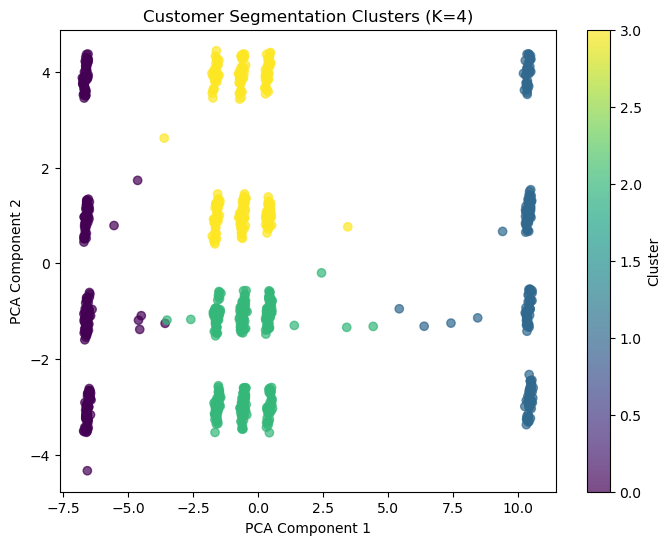

In [34]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce data to 2D for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop(columns=['Cluster']))  # Exclude cluster column

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Segmentation Clusters (K=4)")
plt.colorbar(label="Cluster")
plt.show()

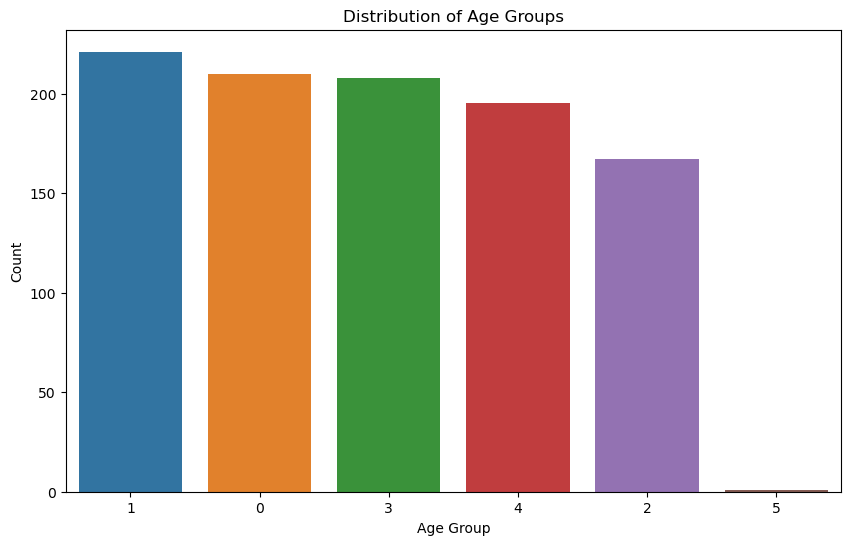

In [35]:
# Plot the distribution of age groups
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', data=df, order=df['Age'].value_counts().index)
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

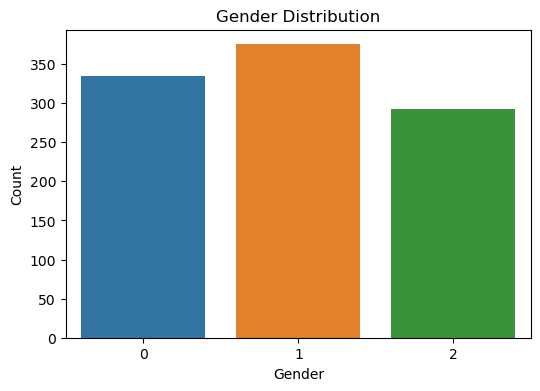

In [36]:
# Plot the distribution of gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

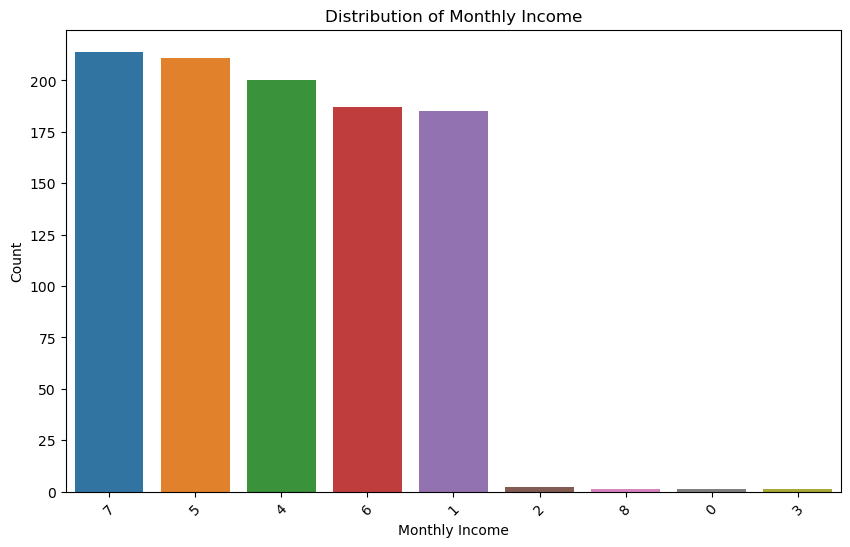

In [37]:
# Plot the distribution of monthly income
plt.figure(figsize=(10, 6))
sns.countplot(x='Monthly Income', data=df, order=df['Monthly Income'].value_counts().index)
plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

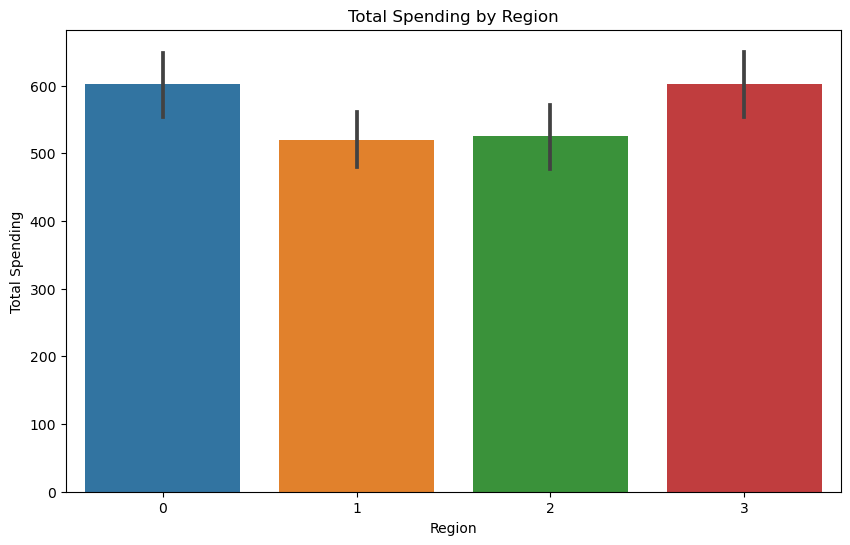

In [38]:
# Plot average spending by region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Average spending', data=df, estimator=sum)
plt.title('Total Spending by Region')
plt.xlabel('Region')
plt.ylabel('Total Spending')
plt.show()

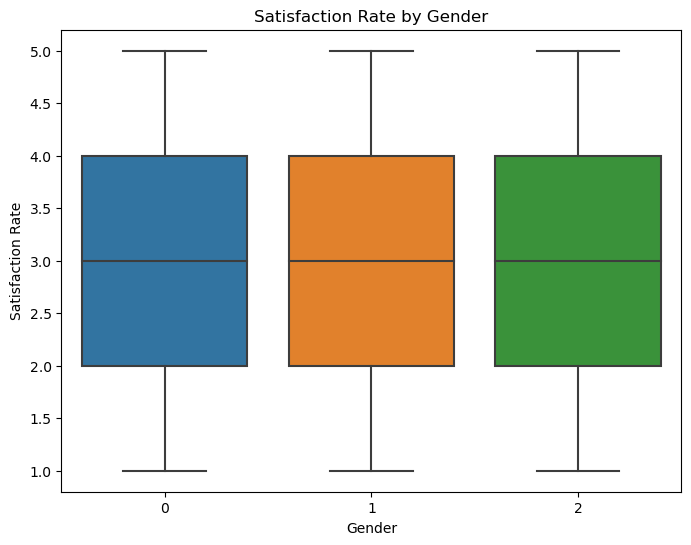

In [39]:
# Plot satisfaction rate by gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Rate of Satisfaction', data=df)
plt.title('Satisfaction Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Satisfaction Rate')
plt.show()

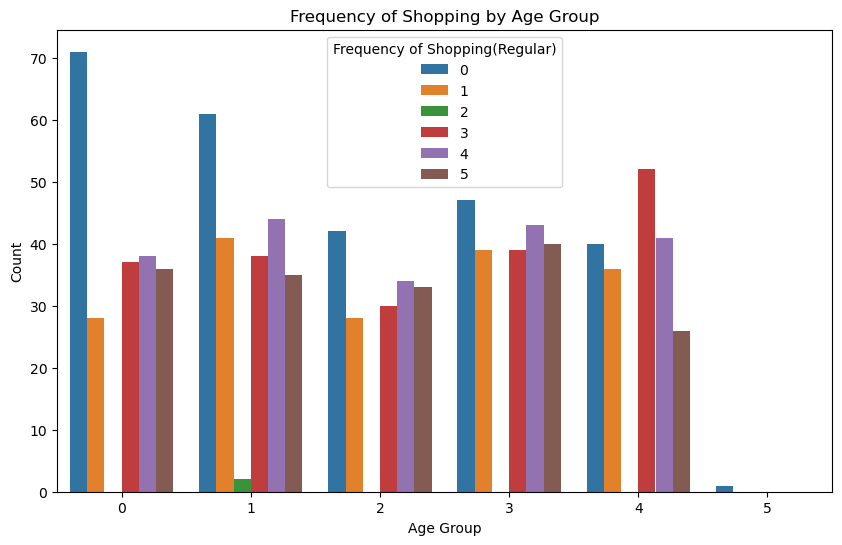

In [40]:
# Plot frequency of shopping by age group
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='Frequency of Shopping(Regular)', data=df)
plt.title('Frequency of Shopping by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Frequency of Shopping(Regular)')
plt.show()

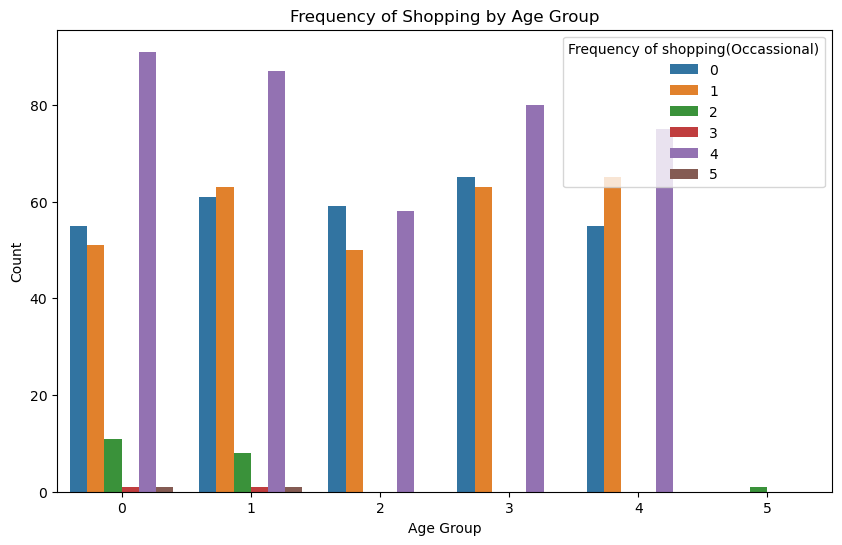

In [41]:
# Plot frequency of shopping by age group
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='Frequency of shopping(Occassional)', data=df)
plt.title('Frequency of Shopping by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Frequency of shopping(Occassional)')
plt.show()

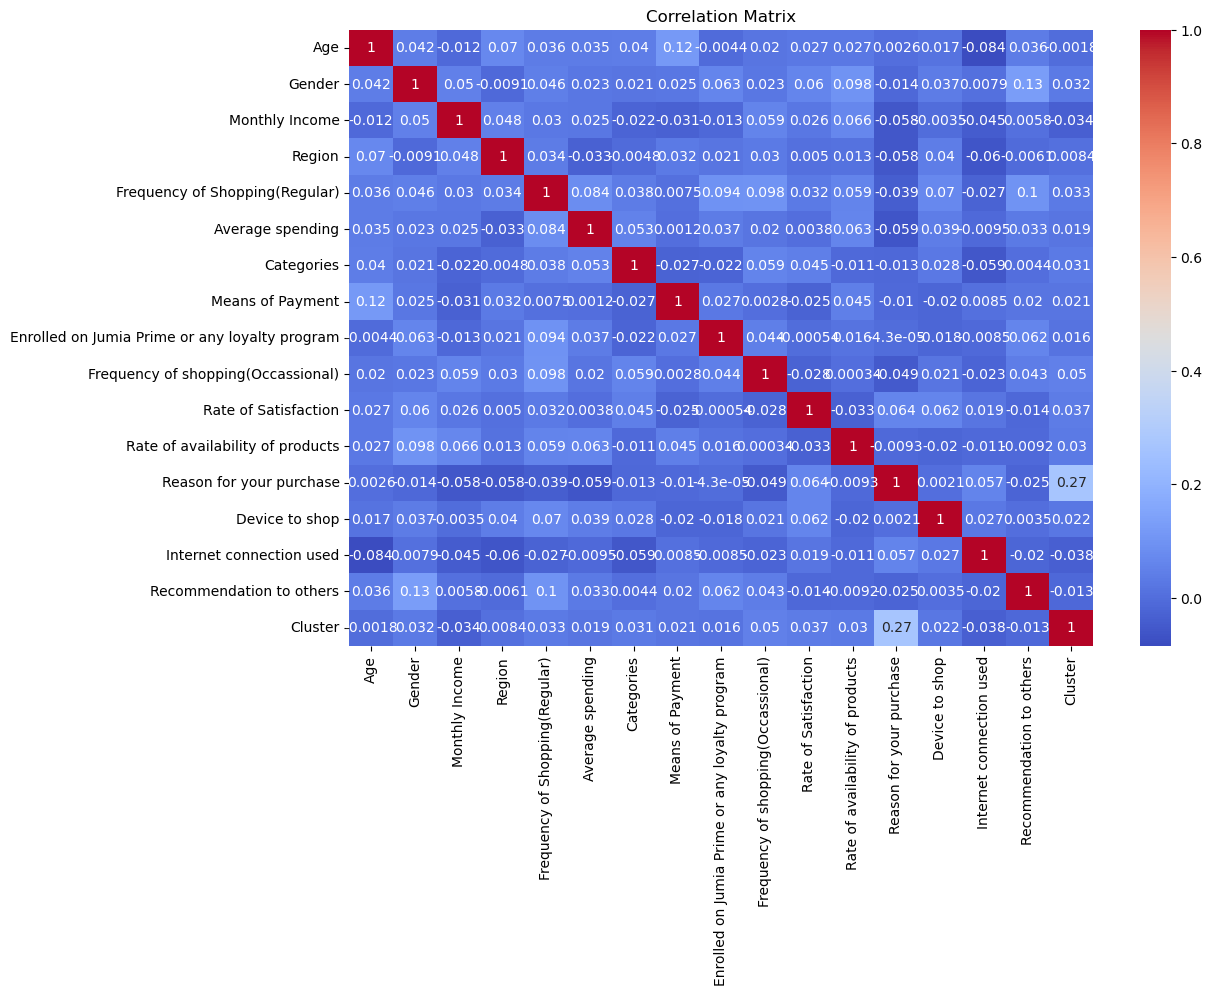

In [42]:
# Convert categorical variables to numerical for correlation
df_numeric = df.apply(lambda x: pd.factorize(x)[0])

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

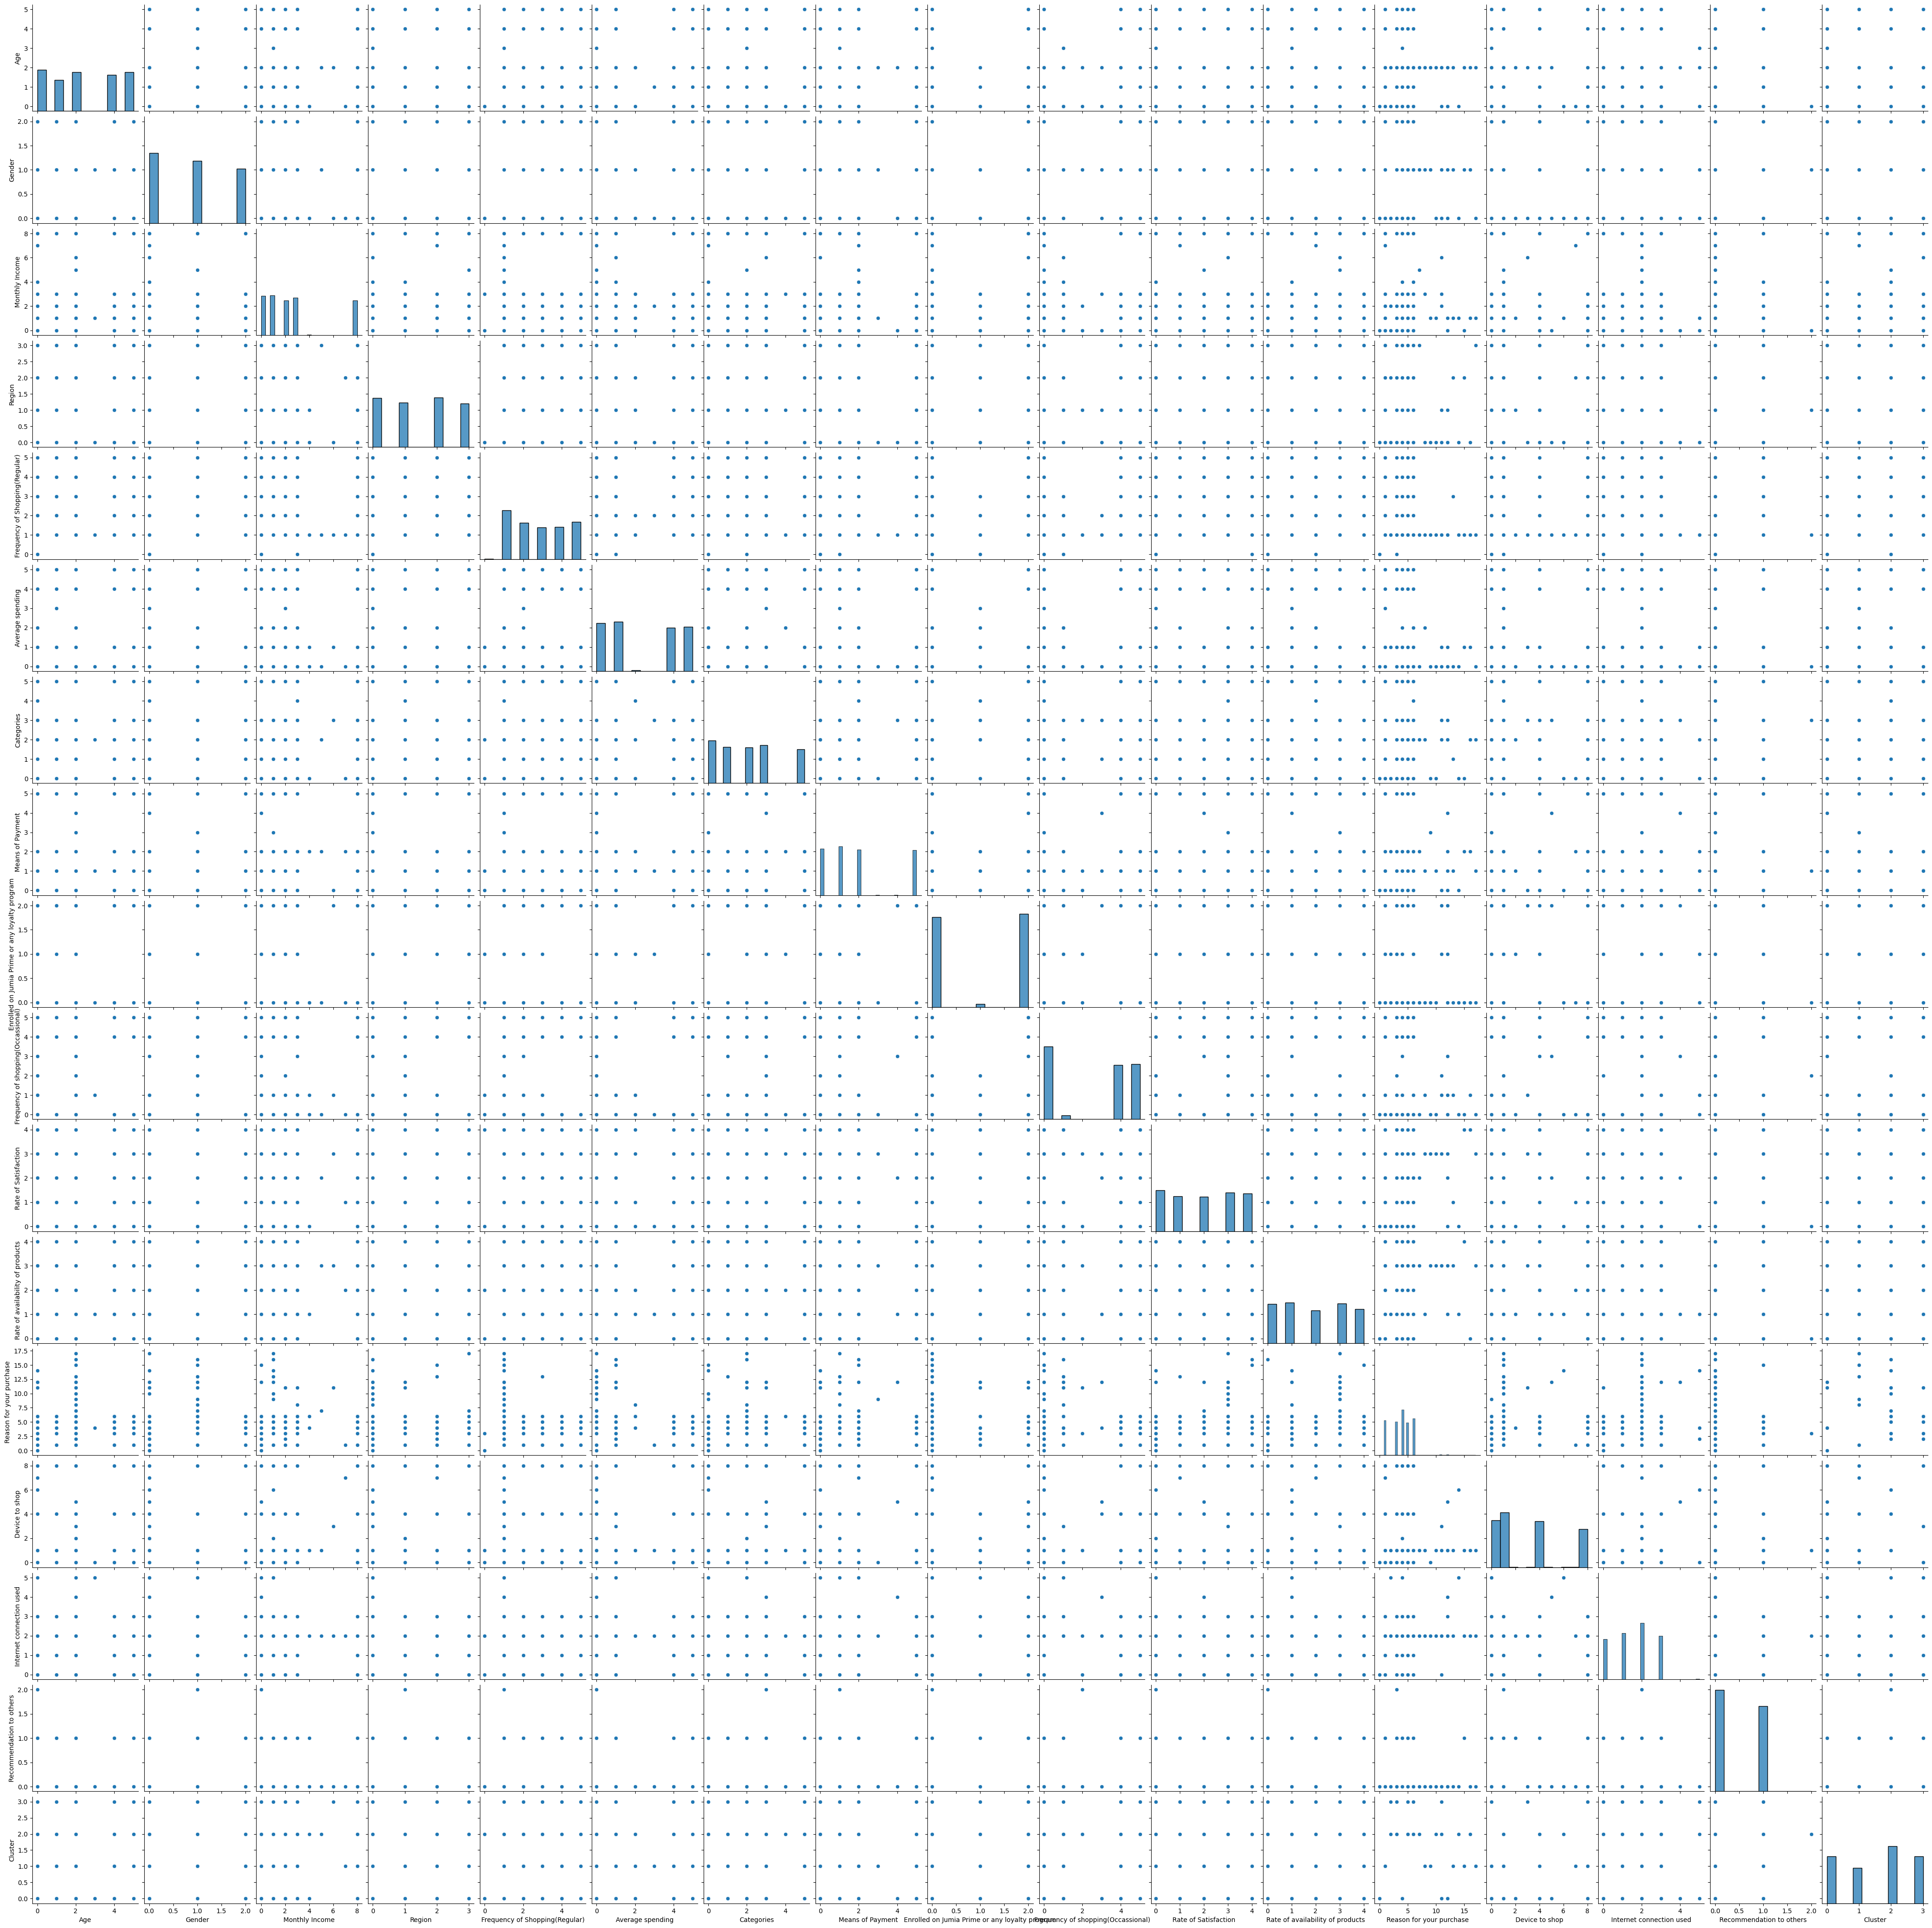

In [43]:
# Pairplot of numerical features
sns.pairplot(df_numeric)
plt.show()

In [44]:
print("DataFrame columns:", df.columns.tolist())

DataFrame columns: ['Age', 'Gender', 'Monthly Income', 'Region', 'Frequency of Shopping(Regular)', 'Average spending', 'Categories', 'Means of Payment', 'Enrolled on Jumia Prime or any loyalty program', 'Frequency of shopping(Occassional)', 'Rate of Satisfaction', 'Rate of availability of products', 'Reason for your purchase', 'Device to shop', 'Internet connection used', 'Recommendation to others', 'Cluster']


In [45]:
plt.figure(figsize=(12, 8))

# Select and group the most important numeric features
cluster_stats = df.groupby('Cluster').agg({
    'Average spending': 'mean',
    'Rate of Satisfaction': 'mean',
    'Frequency of Shopping(Regular)': lambda x: x.map({
        'Daily': 4,
        'Weekly': 3,
        'Monthly': 2,
        'Rarely': 1
    }).mean(),
    'Monthly Income': lambda x: x.map({
        '<450,000': 1,
        '450,000-1,000,000': 2,
        '1,000,000-2,000,000': 3,
        '>2,000,000': 4
    }).mean()
})

# Create the heatmap
sns.heatmap(
    cluster_stats.T,  # Transpose for better readability
    annot=True,
    cmap='YlGnBu',
    fmt='.2f',
    linewidths=.5,
    cbar_kws={'label': 'Average Value'}
)

plt.title('Average Characteristics by Cluster', pad=20)
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.xticks(rotation=0)
plt.yticks(rotation=45)
plt.tight_layout()
plt.savefig('cluster_characteristics.png', bbox_inches='tight', dpi=300)
plt.close()

In [46]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

plt.figure(figsize=(10, 6))
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
sample_silhouette_values = silhouette_samples(X_scaled, df['Cluster'])

y_lower = 10
for i in range(3):  # Assuming 3 clusters
    ith_cluster_values = sample_silhouette_values[df['Cluster'] == i]
    ith_cluster_values.sort()
    
    size_cluster_i = ith_cluster_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = plt.cm.viridis(float(i) / 3)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title(f"Silhouette Analysis (Avg Score: {silhouette_avg:.2f})")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.savefig('silhouette_analysis.png', bbox_inches='tight', dpi=300)
plt.close()